# Explore annotated posts
Out of the posts that Ian annotated as containing toponyms:

- how many contain at least one toponym?
- what is the distribution over unique toponyms?

We want to know what the distribution will probably look like over the entire corpus.

In [13]:
import codecs
from data_helpers import extract_annotations, extract_topo_annotations
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [10]:
annotation_file = '../../data/facebook-maria/all_group_sample_statuses_annotated.txt'
annotation_lines = [l.strip().split('\t')[1] for l in codecs.open(annotation_file, 'r', encoding='utf-8')]
annotations = extract_topo_annotations(annotation_lines)
print(annotation_lines[:10])
print(annotations[:10])

[u'Las ayudas donde estan parando ?', u'@Clandestino te agararon de toalla pa limpiarle el nombre al otro ... Recuerda que tu vives del pueblo y lo que hiso el se\xf1or Narmito Representante desde la luna se notava que era para su uso personal VIP ! @Clandestino consejo no metas tus manos al fuego por algien recuerda que tu eres lo q eres gracias al pueblo despues de 3 dias da cara 2 verciones de amistad 1 video y la gente pasando habre y sed ! ! ?? ?? ?? ?? DESPUES QUE PASAN EL VIDEO REPARTE LOS SUMINISTROS ESA MISMA NOCHE CUANDO SUPUESTAMENTE LOS ESTABA GUARDANDO PAL OTRO DIA ?? ?? ?? ?? ?? ?? Narmito Ortiz CHARLATANahhhh bloqueenme este tambie . l .', u'Ma\xf1ana van a [[Corozal]]{CITY} ! Tienes que ver el v\xeddeo ! ! #uni1porpuertorico', u'Alguien sabe de Juan Antonio ( Tony ) Colon ?', u'Esta es parte de mi familia mi hermano Emanuel Rojas ( nolito / nolo ) mi hermana Liz y mi madre Asuncion Hernandez ( sunty ) viven en el Barrio [[San Antonio]]{CITY} sector las arenas [[callejon

## Number of toponyms per post

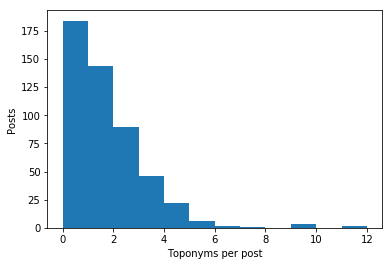

In [48]:
topo_counts = np.array(map(len, annotations))
bins = len(np.unique(topo_counts))+2
counts, bin_splits = np.histogram(topo_counts, bins=bins)
plt.hist(topo_counts, bins=bins)
plt.xlabel('Toponyms per post')
plt.ylabel('Posts')
plt.show()

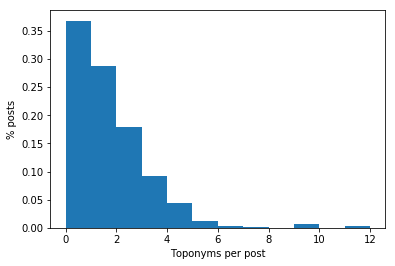

In [47]:
from __future__ import division
# percents
topo_pct_list = counts / counts.sum()
plt.bar(bin_splits[:-1]+.5, topo_pct_list, width=1)
plt.xlabel('Toponyms per post')
plt.ylabel('% posts')
plt.show()

In [28]:
import pandas as pd
topo_count_series = pd.Series(dict(zip(bin_splits, counts)))
print(topo_count_series)

0.0     184
1.0     144
2.0      90
3.0      46
4.0      22
5.0       6
6.0       2
7.0       1
8.0       0
9.0       3
10.0      0
11.0      2
dtype: int64


What does this look like if we take out the UNK toponyms?

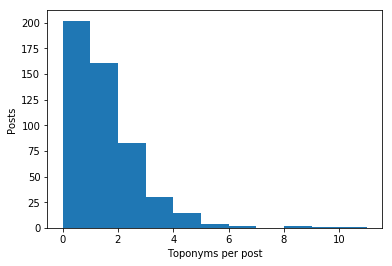

0.0     202
1.0     161
2.0      83
3.0      30
4.0      14
5.0       4
6.0       2
7.0       0
8.0       2
9.0       1
10.0      1
dtype: int64


In [69]:
non_unk_annotations = map(lambda x: filter(lambda y: y[1]!='UNK', x), annotations)
non_unk_topo_counts = map(len, non_unk_annotations)
bins = len(np.unique(non_unk_topo_counts))+1
non_unk_counts, bin_splits = np.histogram(non_unk_topo_counts, bins=bins)
plt.hist(non_unk_topo_counts, bins=bins)
plt.xlabel('Toponyms per post')
plt.ylabel('Posts')
plt.show()
non_unk_topo_count_series = pd.Series(dict(zip(bin_splits, non_unk_counts)))
print(non_unk_topo_count_series)

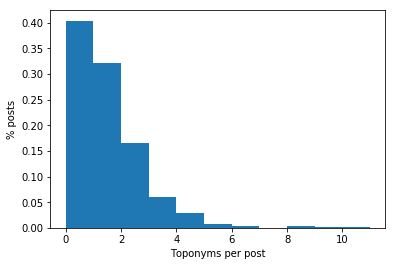

In [59]:
non_unk_topo_pct_list = non_unk_counts / non_unk_counts.sum()
plt.bar(bin_splits[:-1]+.5, non_unk_topo_pct_list, width=1)
plt.xlabel('Toponyms per post')
plt.ylabel('% posts')
plt.show()

Still holding strong at 60% of posts with at least one valid toponym!

## Unique toponym counts

In [70]:
from collections import Counter
mention_counter = Counter()
type_counter = Counter()
for annotation_list in non_unk_annotations:
    if(len(annotation_list) > 0):
        topo_mentions, topo_types = zip(*annotation_list)
        mention_counter.update(topo_mentions)
        type_counter.update(topo_types)

In [71]:
print(mention_counter.most_common(10))
print(type_counter.most_common(10))

[(u'Guayama', 26), (u'Vega Alta', 20), (u'Ponce', 15), (u'Coamo', 14), (u'Yabucoa', 11), (u'Lajas', 11), (u'Utuado', 11), (u'Vega Baja', 10), (u'Quebradillas', 9), (u'Barranquitas', 8)]
[(u'CITY', 365), (u'TOPO', 176)]


In [72]:
mention_count_series = pd.Series(mention_counter).sort_values(inplace=False, ascending=False)
print(mention_count_series)

Guayama                           26
Vega Alta                         20
Ponce                             15
Coamo                             14
Yabucoa                           11
Lajas                             11
Utuado                            11
Vega Baja                         10
Quebradillas                       9
Barranquitas                       8
Corozal                            7
San Juan                           7
Cidra                              7
Cayey                              7
coamo                              6
Pueblo                             5
San Antonio                        4
Patillas                           4
Marin                              4
Isabela                            4
Naranjito                          4
quebradillas                       4
Carolina                           3
Arroyo                             3
vega baja                          3
Mulas                              3
Helechal                           3
A

In [74]:
# estimating the long tail
print('%d count-1 toponyms'%(len(mention_count_series[mention_count_series==1])))

257 count-1 toponyms


That's a long tail! Out of the 319 unique toponyms, 257 appear only once (81%).

In [78]:
from unidecode import unidecode
# double-check for lowercase, accent-stripping
norm_annotations = map(lambda x: map(lambda y: (unidecode(y[0]).lower(), y[1]), x), non_unk_annotations)
norm_mention_counter = Counter()
for annotation_list in norm_annotations:
    if(len(annotation_list) > 0):
        topo_mentions, _ = zip(*annotation_list)
        norm_mention_counter.update(topo_mentions)

In [79]:
print(norm_mention_counter.most_common(10))

[('guayama', 28), ('vega alta', 23), ('coamo', 20), ('ponce', 15), ('yabucoa', 13), ('quebradillas', 13), ('vega baja', 13), ('utuado', 12), ('lajas', 12), ('barranquitas', 9)]


In [80]:
norm_mention_count_series = pd.Series(norm_mention_counter).sort_values(inplace=False, ascending=False)
print(norm_mention_count_series)

guayama                    28
vega alta                  23
coamo                      20
ponce                      15
vega baja                  13
yabucoa                    13
quebradillas               13
utuado                     12
lajas                      12
barranquitas                9
corozal                     8
cidra                       8
cayey                       7
san juan                    7
pueblo                      6
isabela                     5
naranjito                   5
marin                       4
san antonio                 4
corazon                     4
bayamon                     4
patillas                    4
arroyo                      3
helechal                    3
aguadilla                   3
mulas                       3
borinquen                   3
calle cementerio            3
carolina                    3
pulguillas                  2
                           ..
llano                       1
llanos                      1
monte sant

In [81]:
print('%d count-1 toponyms'%(len(norm_mention_count_series[norm_mention_count_series==1])))

222 count-1 toponyms


Again, a high proportion (77%) of one-occurrence toponyms.

Plot for posterity.

In [84]:
print(norm_mention_count_series.value_counts())

1     222
2      37
3       7
4       5
13      3
12      2
8       2
7       2
5       2
28      1
23      1
20      1
15      1
9       1
6       1
dtype: int64


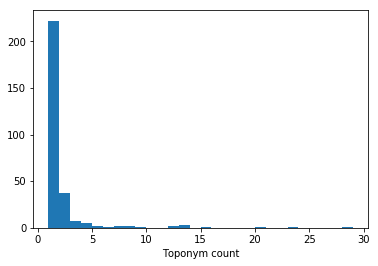

In [94]:
norm_mention_count_frequencies = norm_mention_count_series.value_counts()
plt.bar(norm_mention_count_frequencies.index.values + .5, norm_mention_count_frequencies, width=1)
plt.xlabel('Toponym count')
plt.show()

Let's fit a Zipf distribution so that we can extrapolate about how the distribution will look for $N=20,000$ posts.

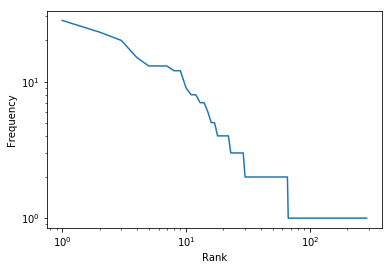

In [106]:
# log-log rank vs. frequency plot
norm_mention_count_series_rank = np.arange(1,len(norm_mention_count_series)+1)
plt.loglog(norm_mention_count_series_rank, norm_mention_count_series)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

Looks like good old Zipf.

In [132]:
from __future__ import division
from scipy.optimize import curve_fit
from scipy.special import zetac

def zipf(x, a):
    return (x**-a)/zetac(a)
counts_estimate = curve_fit(zipf, norm_mention_count_series_rank, norm_mention_count_series, p0=[0.0])
params, cov = counts_estimate
a = params[0]
cov = cov[0][0]
print(a)
print(cov)

5.04396638423
0.0209457004035


In [155]:
counts_fit = map(lambda x: zipf(x, a), norm_mention_count_series_rank)

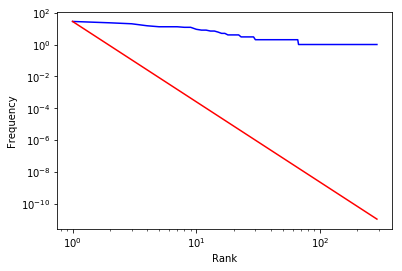

In [156]:
plt.loglog(norm_mention_count_series_rank, norm_mention_count_series, color='b')
plt.loglog(norm_mention_count_series_rank, counts_fit, color='r')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

That didn't work too great! 

Should we just fit a linear curve between rank and frequency? That would certainly fit better.